In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
plt.rcParams["figure.figsize"] = (14,6)

In [43]:
confirmed_us = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
deaths_us = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
confirmed_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [44]:
confirmed_ar = confirmed_global[confirmed_global["Country/Region"] == "Argentina"].iloc[:,4:].T
recovered_ar = recovered_global[recovered_global["Country/Region"] == "Argentina"].iloc[:,4:].T
deaths_ar = deaths_global[deaths_global["Country/Region"] == "Argentina"].iloc[:,4:].T

In [45]:
confirmed_ar.columns = ["C"]
recovered_ar.columns = ["R"]
deaths_ar.columns = ["D"]

In [46]:
idx = pd.to_datetime(confirmed_ar.index)
data_ar = pd.DataFrame(data={"Total_Confirmed":confirmed_ar.C, "R":recovered_ar.R, "D":deaths_ar.D}, index=idx)

In [47]:
data_ar["I"] = data_ar["Total_Confirmed"] - data_ar["R"] - data_ar["D"]
data_ar = data_ar[["I", "R", "D", "Total_Confirmed"]]
data_ar = data_ar[data_ar.I > 0]
data_ar

,I,R,D,Total_Confirmed
2020-03-03,1,0,0,1
2020-03-04,1,0,0,1
2020-03-05,1,0,0,1
2020-03-06,2,0,0,2
2020-03-07,8,0,0,8
...,...,...,...,...
2020-05-08,3659,1659,293,5611
2020-05-09,3748,1728,300,5776
2020-05-10,3972,1757,305,6034
2020-05-11,4127,1837,314,6278


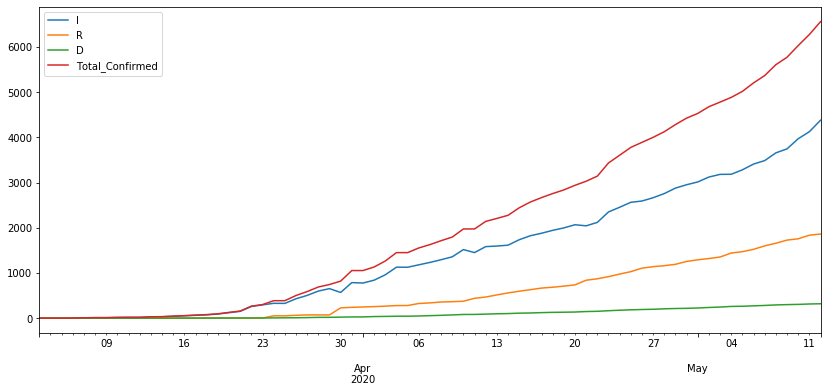

In [48]:
data_ar.plot()

In [49]:
data_ar = data_ar.reset_index()
data_ar = data_ar.rename(columns={"index": "date"})
data_ar.to_csv("../data/obs_arg.csv", index=False)

In [33]:
confirmed_us.columns[:30]

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20'],
      dtype='object')

In [34]:
confirmed_us = confirmed_us.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])

In [35]:
confirmed_us = confirmed_us.groupby("Province_State").sum().T

In [36]:
confirmed_us.index = pd.to_datetime(confirmed_us.index)

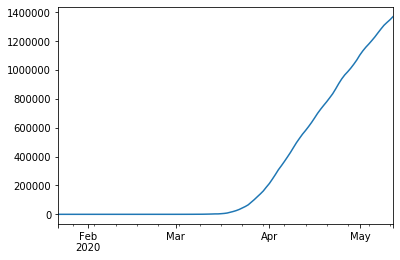

In [37]:
confirmed_us.sum(axis=1).plot()

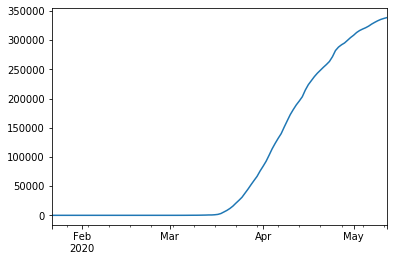

In [38]:
confirmed_us["New York"].plot()

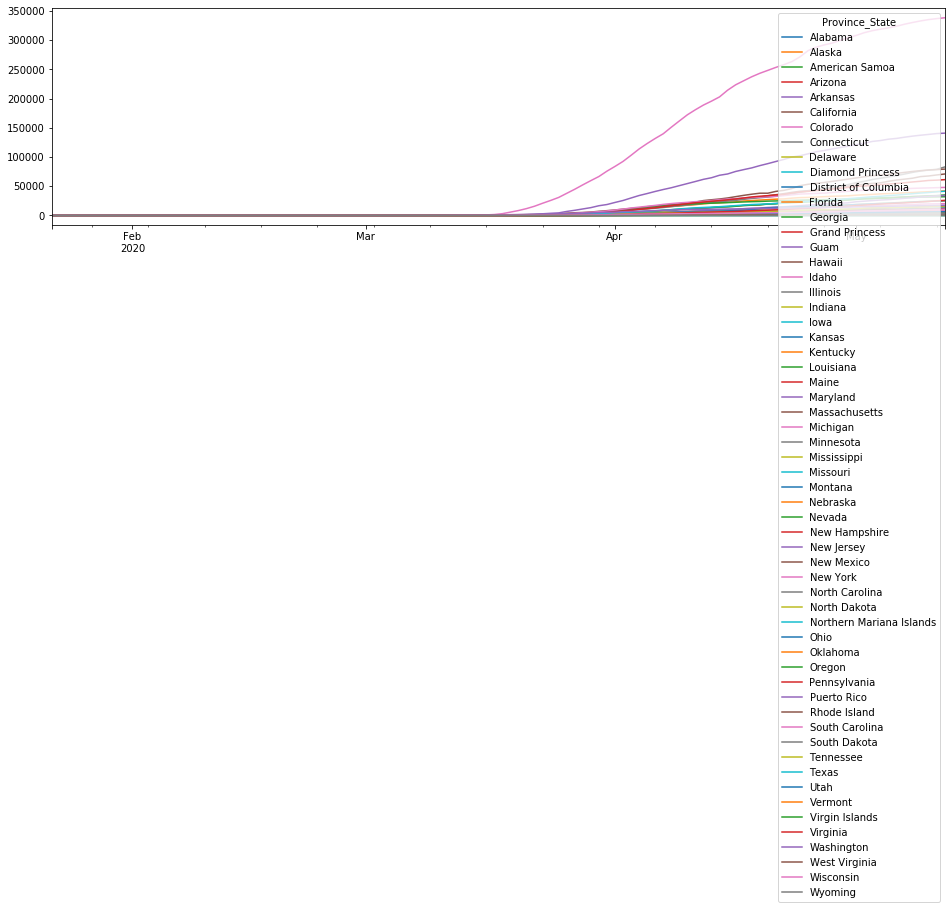

In [39]:
confirmed_us.plot(figsize=(16,4))